<a href="https://colab.research.google.com/github/Optimus2007/Titanic_Survival/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Logistic Regression

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [28]:
df = pd.read_csv('Titanic-Dataset.csv').drop(['Name'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
x=df.iloc[:,2:]
y=df.iloc[:,1]

In [30]:
numerical_features=['Age','Fare']
categorical_features=['Sex','Embarked','Cabin','Ticket']

In [31]:
from sklearn.pipeline import Pipeline

preprocessing = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numerical_features),
    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
x_train=preprocessing.fit_transform(x_train)
x_test=preprocessing.transform(x_test)

In [34]:
model=LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)


LogisticRegression(solver='liblinear')

In [35]:
y_pred = model.predict(x_test)

In [36]:
prediction = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
prediction.head()

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1


In [37]:
accuracy_score(y_test,y_pred)*100

81.00558659217877

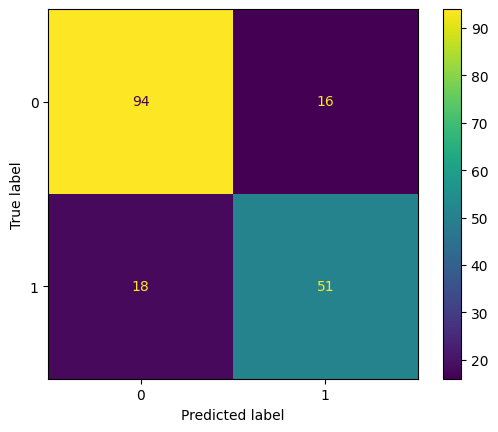

In [38]:
from sklearn.metrics import confusion_matrix
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=model.classes_).plot()

 Using XGBoost Model

In [39]:
!pip install xgboost

In [40]:
from xgboost import XGBClassifier

In [41]:
xgb_model=XGBClassifier( n_estimators=300,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        eval_metric='logloss')
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [42]:
xgb_pred=xgb_model.predict(x_test)

In [43]:
accuracy_score(y_test,xgb_pred)*100

83.79888268156425

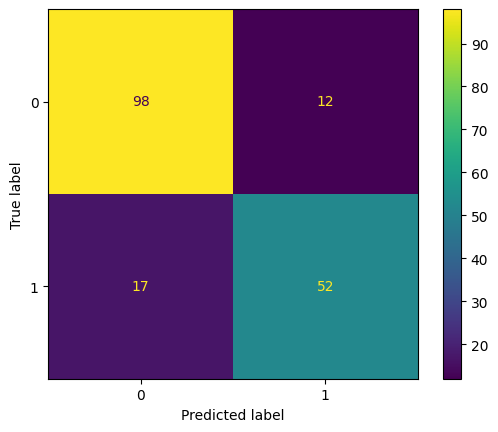

In [44]:
ConfusionMatrixDisplay(confusion_matrix(y_test,xgb_pred),display_labels=xgb_model.classes_).plot()

Using Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model2=RandomForestClassifier(n_estimators=100)
model2.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
model2_pred=model2.predict(x_test)

In [48]:
accuracy_score(y_test,model2_pred)*100

85.47486033519553

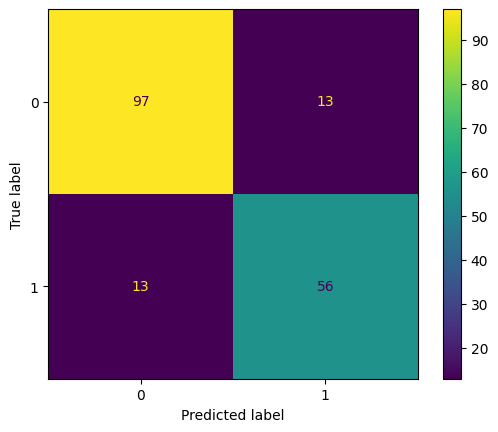

In [49]:
ConfusionMatrixDisplay(confusion_matrix(y_test,model2_pred),display_labels=model2.classes_).plot()